<a href="https://colab.research.google.com/github/alirezabayatmk/pima-indians-diabetes/blob/master/pima_indians_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth,files
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


In [4]:
link = 'https://drive.google.com/open?id=1xVIYBHSvvMwF3yo3ePGI9t_4W98fsPNe'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('diabetes.csv')  
d_data = pd.read_csv('diabetes.csv')
# Dataset is now stored in a Pandas Dataframe

1xVIYBHSvvMwF3yo3ePGI9t_4W98fsPNe


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

seed = 42
np.random.seed(seed)

Using TensorFlow backend.


In [0]:
d_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
d_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
x = d_data.iloc[:,:-1].values
y = d_data.iloc[:,-1].values
X_train , X_test , y_train , y_test= train_test_split(x , y , test_size=0.2 , random_state=1)

In [9]:
zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def check_zero_entries(data, fields):
    """ List number of 0-entries in each of the given fields"""
    for field in fields:
        print('field %s: num 0-entries: %d' % (field, len(data.loc[ data[field] == 0, field ])))

check_zero_entries(d_data, zero_fields)

field Glucose: num 0-entries: 5
field BloodPressure: num 0-entries: 35
field SkinThickness: num 0-entries: 227
field Insulin: num 0-entries: 374
field BMI: num 0-entries: 11


In [6]:
features = list(d_data.columns.values)
features.remove('Outcome')
print(features)
X = d_data[features]
y = d_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print(X_train.shape)
print(X_test.shape)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
(614, 8)
(154, 8)


In [0]:
def impute_zero_field(data, field):
    nonzero_vals = data.loc[data[field] != 0, field]
    avg = np.sum(nonzero_vals) / len(nonzero_vals)
    k = len(data.loc[ data[field] == 0, field])   # num of 0-entries
    data.loc[ data[field] == 0, field ] = avg
    print('Field: %s; fixed %d entries with value: %.3f' % (field, k, avg))

In [11]:
for field in zero_fields:
    impute_zero_field(X_train, field)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Field: Glucose; fixed 3 entries with value: 121.853
Field: BloodPressure; fixed 29 entries with value: 72.275
Field: SkinThickness; fixed 191 entries with value: 28.771
Field: Insulin; fixed 306 entries with value: 157.558
Field: BMI; fixed 7 entries with value: 32.200


In [12]:
check_zero_entries(X_train, zero_fields)

field Glucose: num 0-entries: 0
field BloodPressure: num 0-entries: 0
field SkinThickness: num 0-entries: 0
field Insulin: num 0-entries: 0
field BMI: num 0-entries: 0


In [13]:
for field in zero_fields:
    impute_zero_field(X_test, field)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Field: Glucose; fixed 2 entries with value: 121.020
Field: BloodPressure; fixed 6 entries with value: 72.919
Field: SkinThickness; fixed 36 entries with value: 30.525
Field: Insulin; fixed 68 entries with value: 148.349
Field: BMI; fixed 4 entries with value: 33.501


In [14]:
check_zero_entries(X_test, zero_fields)

field Glucose: num 0-entries: 0
field BloodPressure: num 0-entries: 0
field SkinThickness: num 0-entries: 0
field Insulin: num 0-entries: 0
field BMI: num 0-entries: 0


In [0]:
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

In [17]:
NB_EPOCHS = 150  
BATCH_SIZE = 5


model = Sequential()

model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid' ))

model.compile(loss='binary_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])

print('Starting training...')
history = model.fit(X_train ,y_train ,validation_data=(X_test, y_test) ,nb_epoch=NB_EPOCHS ,batch_size=BATCH_SIZE ,verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Starting training...
Train on 614 samples, validate on 154 samples
Epoch 1/150
614/614 [==============================] - 0s 692us/step - loss: 0.6734 - acc: 0.6466 - val_loss: 0.6712 - val_acc: 0.6429
Epoch 2/150
614/614 [==============================] - 0s 268us/step - loss: 0.6650 - acc: 0.6531 - val_loss: 0.6652 - val_acc: 0.6429
Epoch 3/150
614/614 [==============================] - 0s 265us/step - loss: 0.6553 - acc: 0.6531 - val_loss: 0.6568 - val_acc: 0.6429
Epoch 4/150
614/614 [==============================] - 0s 268us/step - loss: 0.6381 - acc: 0.6596 - val_loss: 0.6436 - val_acc: 0.6429
Epoch 5/150
614/614 [==============================] - 0s 266us/step - loss: 0.6231 - acc: 0.6710 - val_loss: 0.6724 - val_acc: 0.6558
Epoch 6/150
614/614 [==============================] - 0s 272us/step - loss: 0.6143 - acc: 0.6873 - val_loss: 0.6372 - val_acc: 0.6494
Epoch 7/150
614/614 [==============================] - 0s 272us/step - loss: 0.6169 - acc: 0.7020 - val_loss: 0.6200 - val_

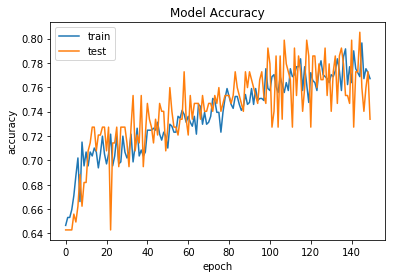

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

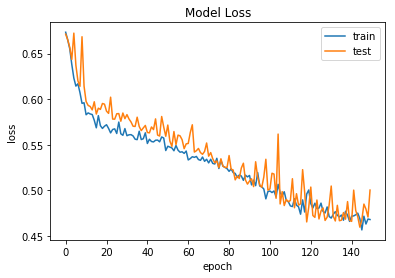

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [20]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 73.38%
